In [1]:
# %load ../../setup.py
"""
Packages for plotting and other stuff
version: 1.0
author: Riasat
"""
# %matplotlib widget

# data loading
import pandas as pd

# data maipulation
import pwlf
import numpy as np
from scipy.interpolate import interp1d, UnivariateSpline
from scipy.signal import find_peaks
from scipy import optimize

# plotting tools
import matplotlib.pyplot as plt

# extra tweaks
import warnings

warnings.filterwarnings("ignore")

# plot tweaks
plt.style.use("seaborn-poster")
pd.options.display.max_columns = None
pd.options.display.float_format = "{:.5f}".format

# function for extrapolation
def extrapolate1d(x, y):
    f = interp1d(x, y, kind="linear", fill_value="extrapolate")
    a = np.arange(0, x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate1d(x, y):
    f = interp1d(x, y, kind="linear", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate2d(x, y):
    f = interp1d(x, y, kind="quadratic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate3d(x, y):
    f = interp1d(x, y, kind="cubic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# funciton for polynomial fitting
def polfit(a, b, c):
    z = np.polyfit(a, b, c)
    f = np.poly1d(z)

    x = np.arange(a[0], a[len(a) - 1], 0.001)
    y = f(x)
    return x, y


# function for picewise linear fit
def picewise_linear_fit(x, y, segments):
    my_pwlf = pwlf.PiecewiseLinFit(x, y)  # fit my data
    res = my_pwlf.fit(segments)  # fit the data for n line segments
    # slopes = myPWLF.calc_slopes()  # calculate slopes

    # predict for the determined points
    xHat = np.linspace(min(x), max(x), num=10000)
    yHat = my_pwlf.predict(xHat)

    # calculate statistics
    # p = myPWLF.p_values(method="non-linear", step_size=1e-4)  # p-values
    # se = myPWLF.se  # standard errors
    return xHat, yHat


# curve fit
def cur_fit(x, y):
    func = lambda t, a, c, d: a * np.log(t + c) + d
    popt, pcov = optimize.curve_fit(func, x, y)  # type: ignore
    xx = np.arange(x[0], x[len(x) - 1], 0.001)
    yy = func(xx, *popt)
    return xx, yy


# Datas


In [2]:
# plateau datas
data_plateau = pd.read_excel("data.xlsx", sheet_name="plateau")
pl_voltage = data_plateau["p_voltage"]
pl_counts = data_plateau["p_counts"]

# al backscattrer
data_al = pd.read_excel("data.xlsx", sheet_name='al_back')
al_thick = data_al['al_thick']
al_0 = data_al['al_0']
al_counts = data_al['al_counts']

# cu backscattrer
data_cu = pd.read_excel("data.xlsx", sheet_name='cu_back')
cu_thick = data_cu['cu_thick']
cu_0 = data_cu['cu_0']
cu_counts = data_cu['cu_counts']

# ag backscattrer
data_ag = pd.read_excel("data.xlsx", sheet_name='ag_back')
ag_thick = data_ag['ag_thick']
ag_0 = data_ag['ag_0']
ag_counts = data_ag['ag_counts']


# Functions


In [3]:

# function for interpolation
def interpolate(x, y):
    f = interp1d(x, y, kind="cubic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b



# Plateau


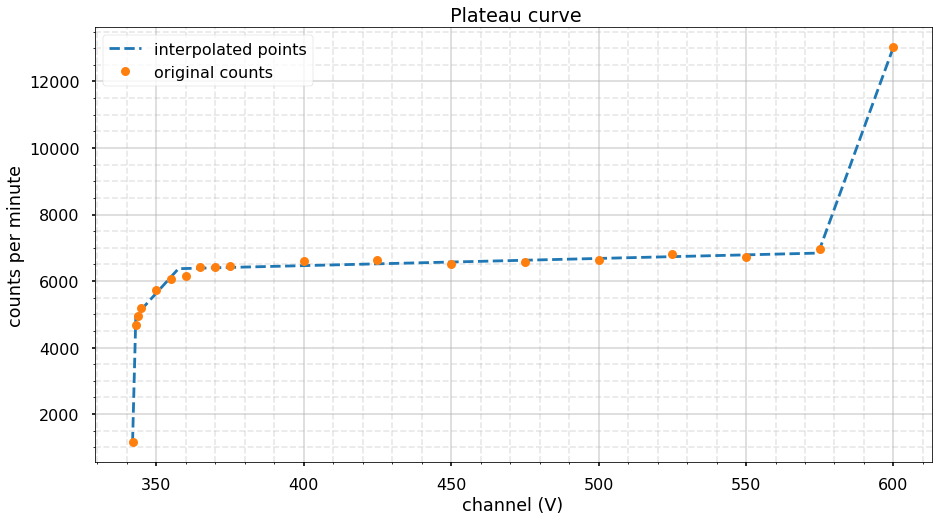

In [4]:
# %matplotlib widget
voltage_interpolated_pl, counts_interpolated_pl = picewise_linear_fit(pl_voltage, pl_counts, 4)

plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))
plt.title(f" Plateau curve")
plt.xlabel("channel (V)")
plt.ylabel("counts per minute")
plt.plot(voltage_interpolated_pl, counts_interpolated_pl, "--", label="interpolated points")
plt.plot(pl_voltage, pl_counts, "o", markersize=9, label="original counts")
plt.legend(loc="upper left")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")
plt.show()


I choosed the operating voltage at 400 V


# Backscattering factor



In [5]:
element_name = ["Aluminium", "Copper", "Silver"]

## Aluminium

In [6]:
f_al = al_counts/al_0
del_f_al = f_al*np.sqrt(1/al_0 + 1/al_counts)
print(f"{f_al}, {del_f_al}")


0   1.01006
1   1.02546
2   1.07200
3   1.06055
4   1.11021
5   1.06351
6   1.08796
7   1.01414
8   1.12189
9   1.09592
dtype: float64, 0   0.03368
1   0.03467
2   0.03577
3   0.03584
4   0.03677
5   0.03560
6   0.03626
7   0.03399
8   0.03708
9   0.03632
dtype: float64


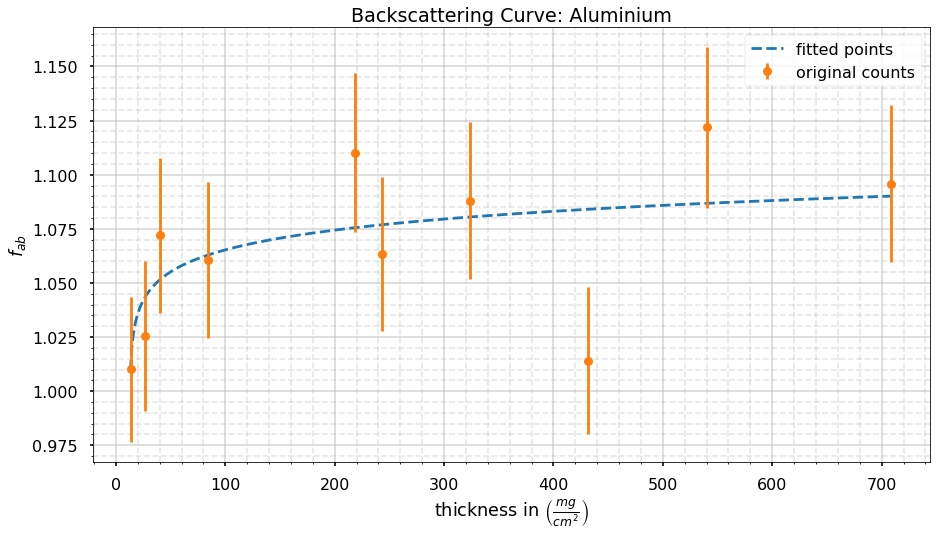

In [7]:
# plotting the curves
# plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))

plt.title(f"Backscattering Curve: {element_name[0]}")
plt.xlabel(r"thickness in $\left(\frac{mg}{cm^2}\right)$")
plt.ylabel(r"$f_{ab}$")

pxal, pyal = cur_fit(al_thick, f_al)
plt.plot(pxal, pyal, "--", label="fitted points")
plt.errorbar(al_thick, f_al, yerr=del_f_al, fmt="o", markersize=9, label="original counts")

plt.legend(loc="upper right")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")

plt.show()

## Copper

In [8]:
f_cu = cu_counts/cu_0
del_f_cu = f_cu*np.sqrt(1/cu_0 + 1/cu_counts)
# cu_thick_interpolate, f_cu_interpolate = polfit(cu_thick,f_cu, 4)
print(f"{f_cu}, {del_f_cu}")

0   1.21291
1   1.26791
2   1.23385
3   1.24561
4   1.23505
dtype: float64, 0   0.04294
1   0.04539
2   0.04399
3   0.04430
4   0.04407
dtype: float64


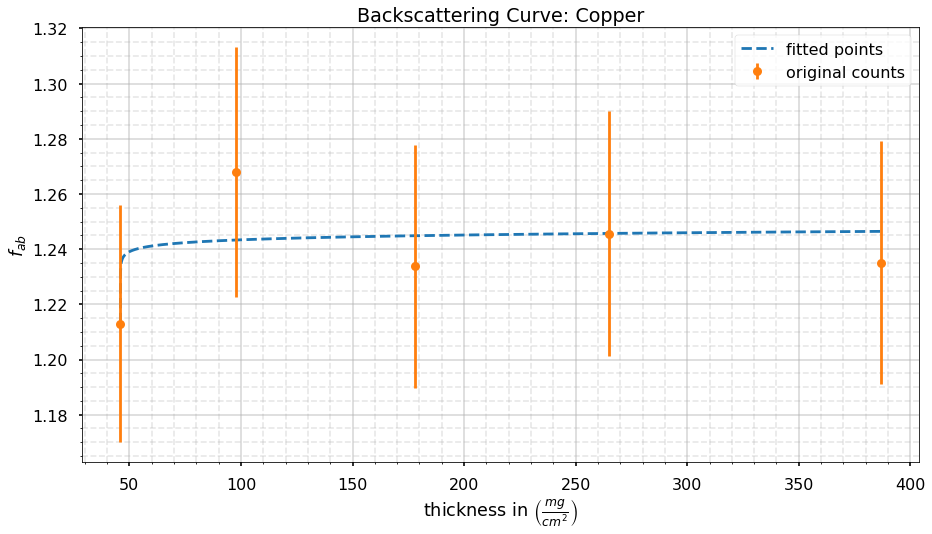

In [9]:
# plotting the curves
# plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))

plt.title(f"Backscattering Curve: {element_name[1]}")
plt.xlabel(r"thickness in $\left(\frac{mg}{cm^2}\right)$")
plt.ylabel(r"$f_{ab}$")

pxcu, pycu = cur_fit(cu_thick, f_cu)
plt.plot(pxcu, pycu, "--", label="fitted points")
plt.errorbar(cu_thick, f_cu, yerr=del_f_cu, fmt="o", markersize=9, label="original counts")

plt.legend(loc="upper right")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")

plt.show()



## Silver

In [10]:
f_ag = ag_counts/ag_0
del_f_ag = f_ag*np.sqrt(1/ag_0 + 1/ag_counts)
print(f"{f_ag}, {del_f_ag}")

0   1.26703
1   1.25911
2   1.27435
3   1.32500
4   1.32883
5   1.32748
6   1.33591
7   1.34225
dtype: float64, 0   0.04423
1   0.04381
2   0.04383
3   0.04625
4   0.04693
5   0.04660
6   0.04683
7   0.04705
dtype: float64


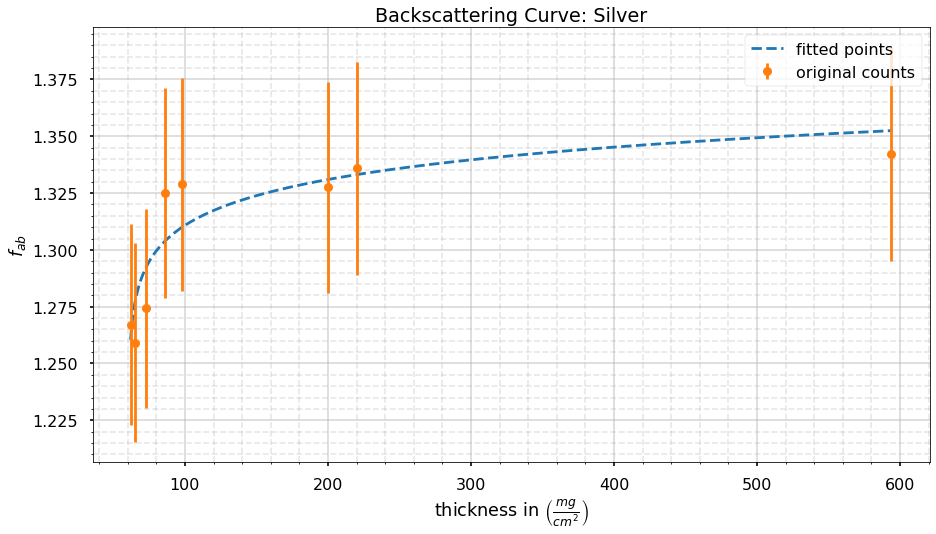

In [11]:
# plotting the curves
# plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))

plt.title(f"Backscattering Curve: {element_name[2]}")
plt.xlabel(r"thickness in $\left(\frac{mg}{cm^2}\right)$")
plt.ylabel(r"$f_{ab}$")

pxag, pyag = cur_fit(ag_thick,  f_ag)
plt.plot(pxag, pyag, "--", label="fitted points")
plt.errorbar(ag_thick, f_ag, yerr=del_f_ag, fmt="o", markersize=9, label="original counts")

plt.legend(loc="upper right")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")

plt.show()

